# Visualizing q-agent

In [9]:
import dominoes
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q_agent = dominoes.players.QAgent()
q_agent.train(100_000)

Done training


# 0. Visualizing the training

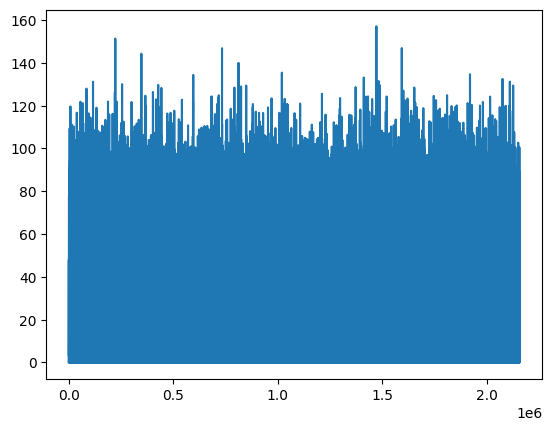

In [3]:
plt.plot(range(len(q_agent.training_error)), q_agent.training_error)

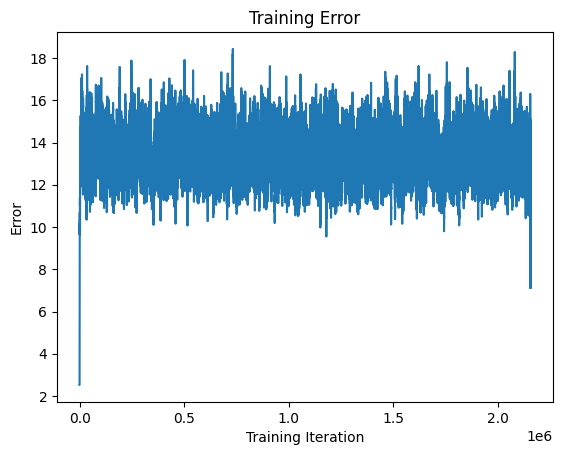

In [4]:
rolling_length = 500
# compute and assign a rolling average of the data to provide a smoother graph
training_error_moving_average = (
    np.convolve(np.array(q_agent.training_error), np.ones(rolling_length), mode="same")
    / rolling_length
)
fig = plt.plot(range(len(training_error_moving_average)), training_error_moving_average)

# set title and labels
plt.title("Training Error")
plt.xlabel("Training Iteration")
plt.ylabel("Error")
plt.show()


# 1. Visualizing the value function

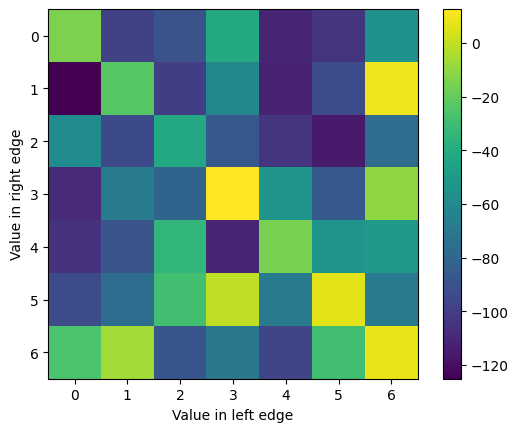

In [7]:

# convert state-action values to state values
state_values = dict()
for key in q_agent.q:
    state = key[0]
    if state not in state_values:
        state_values[state] = q_agent.q[key]
    else:
        state_values[state] += q_agent.q[key]

# create the value grid for plotting
value_grid = np.zeros((7,7))
for key in state_values:
    value_grid[key[0], key[1]] = state_values[key]

# add labels to the axes
plt.xticks(range(7))
plt.yticks(range(7))
plt.xlabel("Value in left edge")
plt.ylabel("Value in right edge")


# plot the value grid
plt.imshow(value_grid)
plt.colorbar()
plt.show()


# Part 2. Multiagent training




In [14]:

from dominoes.players import *
from dominoes.q_learner import QLearner
from dominoes.train import train

PLAYERS = [QLearner(), QLearner(), QLearner(), QLearner()]

train(PLAYERS, n=10000, verbose = False)

Done training


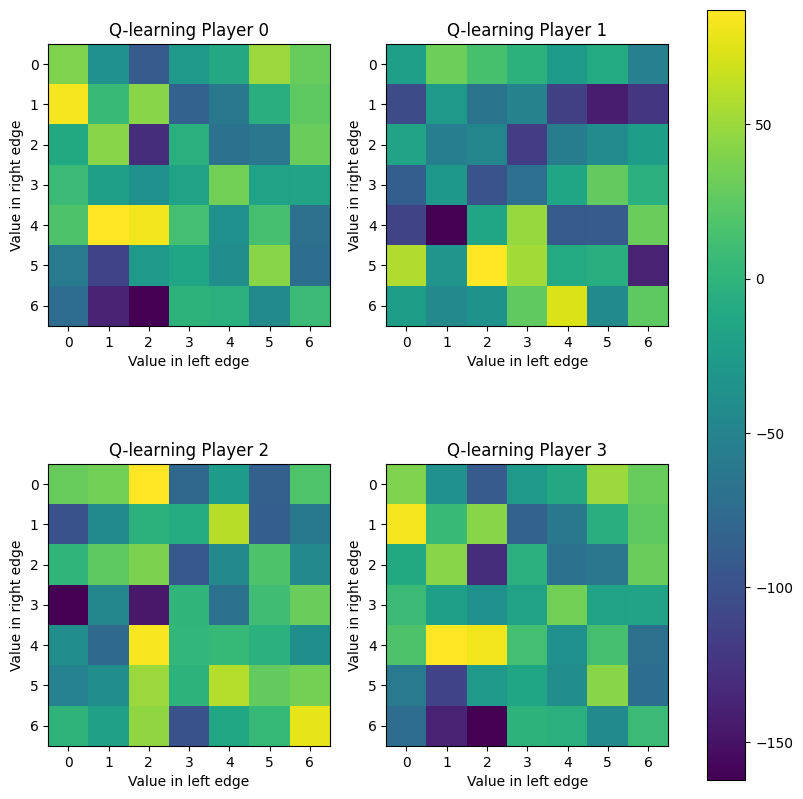

In [19]:
# create a 2 by 2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# iterate over the players in the PLAYERS list
for i, player in enumerate(PLAYERS):
    # convert state-action values to state values
    state_values = dict()
    for key in player.q:
        state = key[0]
        if state not in state_values:
            state_values[state] = player.q[key]
        else:
            state_values[state] += player.q[key]

    # create the value grid for plotting
    value_grid = np.zeros((7,7))
    for key in state_values:
        value_grid[key[0], key[1]] = state_values[key]

    # add labels to the axes
    axs[i//2, i%2].set_xticks(range(7))
    axs[i//2, i%2].set_yticks(range(7))
    axs[i//2, i%2].set_xlabel("Value in left edge")
    axs[i//2, i%2].set_ylabel("Value in right edge")

    # plot the value grid
    axs[i//2, i%2].imshow(value_grid)
    axs[i//2, i%2].set_title(f"{player.name} {i}")

# add a colorbar to the plot
fig.colorbar(axs[0, 0].imshow(value_grid), ax=axs, location='right')

# display the plot
plt.show()

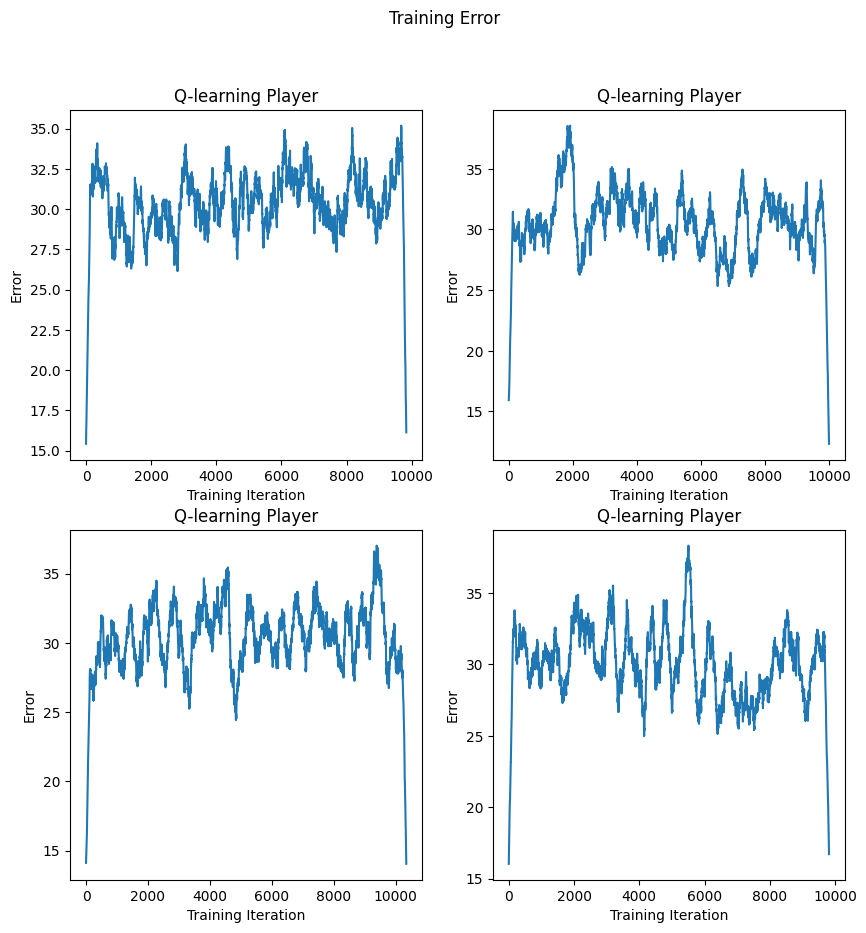

In [20]:
# create a 4 by 4 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# iterate over the players in the PLAYERS list
for i, player in enumerate(PLAYERS):
    # compute the rolling average of the training error
    rolling_length = 250
    training_error_moving_average = (
        np.convolve(np.array(player.training_error), np.ones(rolling_length), mode="same")
        / rolling_length
    )

    # plot the training error in a subplot
    axs[i//2, i%2].plot(range(len(training_error_moving_average)), training_error_moving_average)

    # add labels to the axes and set the title of the subplot
    axs[i//2, i%2].set_xlabel("Training Iteration")
    axs[i//2, i%2].set_ylabel("Error")
    axs[i//2, i%2].set_title(player.name)

# set the title of the entire plot
fig.suptitle("Training Error")

# display the plot
plt.show()